# EXPLORATORY DATA ANALYSIS

# Import Essential Python Libraries

In [10]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Setup : Import the Dataset

We will use the data stored in `cleaned-alzheimers-dataset.csv` created at the end of `Data Extraction and Cleaning`

In [11]:
alzheimersdata = pd.read_csv('cleaned-alzheimers-dataset.csv',index_col= 0)
alzheimersdata

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
368,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323


# Response Variable

Let us start by exploring the response variable `CDR`, the one we are supposed to predict at the end of the day.

/Users/choonray/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


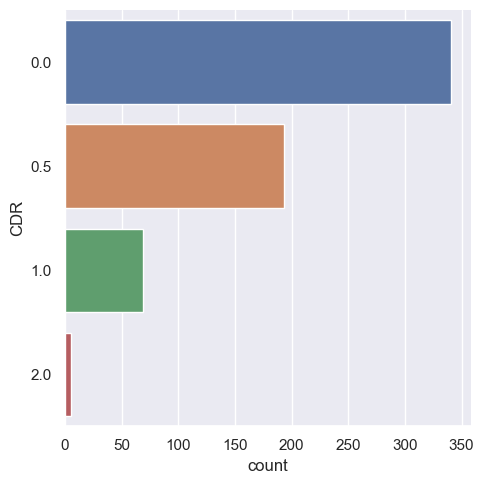

In [12]:
sb.catplot(y = 'CDR', data = alzheimersdata, kind = "count")

In [13]:
countNormal, countVeryMild, countMild, countModerate = alzheimersdata['CDR'].value_counts()
print("Ratio of classes is Normal : Very Mild: Mild: Moderate = ", countNormal, ":", countVeryMild, ":", countMild, ":", countModerate)

Ratio of classes is Normal : Very Mild: Mild: Moderate =  341 : 193 : 69 : 5


Let us explore the other clinical info variable `MMSE`

In [14]:
#ITSCHLOECHLOE

# Predictor Variables

### NUMERIC PREDICTORS

In [15]:
#ITSCHLOECHLOE

### CATEGORICAL PREDICTORS

In [16]:
#ITSCHLOECHLOE

## Predictors Corresponding to Demographics Information

In [17]:
#ITSCHLOECHLOE

## Predictors Corresponding to Derived Anatomic Volumes

In [18]:
#ITSCHLOECHLOE

# Relationship with Response Variables (Clinical Info)

In [19]:
##ITSCHLOECHLOE